## Question 1

### a)

Targets:  [0 1 2 3 4 5 6 7 8 9]


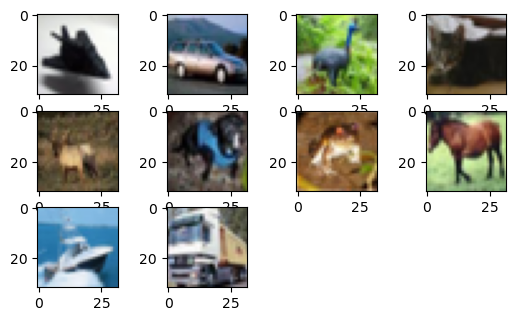

In [51]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.size)
y_test = y_test.reshape(y_test.size)
idxs = [list(y_train).index(i) for i in list(set(y_train))]
print("Targets: ", y_train[idxs])

def collage(imgs):
    n = imgs.shape[0]
    num_rows = num_cols = int(np.ceil(np.sqrt(n)))
    plt.figure()
    for i in range(num_rows):
        for j in range(num_cols):
            if (i*num_cols+j >= n): break
            plt.subplot(num_rows,num_cols,i*num_cols+j+1)
            plt.imshow(imgs[i*num_cols+j],cmap="gray")

collage(X_train[idxs])

### b)

In [105]:
from sklearn.model_selection import ParameterGrid, train_test_split
from tensorflow import keras

epochs = [1, 5, 10]
learning_rates = [1e-4, 1e-3, 1e-2]


grid = ParameterGrid({'epoch':epochs,'learning rate':learning_rates})
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(10,activation='softmax'))


histories = []
for params in grid:
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=params["learning rate"]),
                  loss = keras.losses.SparseCategoricalCrossentropy(),
                  metrics=keras.metrics.SparseCategoricalAccuracy())
    
    history = model.fit(X_train/255,y_train,validation_split=0.3,epochs=params['epoch'],verbose=0)
    histories.append(history)
    print(f'Epochs: {params["epoch"]}\tLearning rate: {params["learning rate"]}\nLoss: {history.history["loss"][params["epoch"]-1]}          Accuracy: {history.history["sparse_categorical_accuracy"][params["epoch"]-1]}\n\n')

Epochs: 1	Learning rate: 0.0001
Loss: 1.97329843044281          Accuracy: 0.28983980417251587


Epochs: 1	Learning rate: 0.001
Loss: 2.0094738006591797          Accuracy: 0.3112691044807434


Epochs: 1	Learning rate: 0.01
Loss: 2.376873254776001          Accuracy: 0.2774243950843811


Epochs: 5	Learning rate: 0.0001
Loss: 1.7235034704208374          Accuracy: 0.4062042832374573


Epochs: 5	Learning rate: 0.001
Loss: 1.7496625185012817          Accuracy: 0.39144188165664673


Epochs: 5	Learning rate: 0.01
Loss: 1.9559754133224487          Accuracy: 0.30293548107147217


Epochs: 10	Learning rate: 0.0001
Loss: 1.6594643592834473          Accuracy: 0.43474268913269043


Epochs: 10	Learning rate: 0.001
Loss: 1.680754542350769          Accuracy: 0.4223953187465668


Epochs: 10	Learning rate: 0.01
Loss: 1.913679838180542          Accuracy: 0.3224599361419678




In [110]:
max_acc = 0
tuned_history = None
tuned_params = None
for params,history in zip(grid,histories):
    if history.history['sparse_categorical_accuracy'][len(history.history['sparse_categorical_accuracy'])-1] > max_acc:
        max_acc = history.history['sparse_categorical_accuracy'][len(history.history['sparse_categorical_accuracy'])-1]
        tuned_history = history.history
        tuned_params = params

print(tuned_params,tuned_history)

{'epoch': 10, 'learning rate': 0.0001} {'loss': [1.7379674911499023, 1.6922950744628906, 1.6807781457901, 1.674446702003479, 1.670366883277893, 1.6668394804000854, 1.6651936769485474, 1.6632510423660278, 1.661441683769226, 1.6594643592834473], 'sparse_categorical_accuracy': [0.3996054232120514, 0.41545629501342773, 0.42232728004455566, 0.42715737223625183, 0.4287900924682617, 0.43171536922454834, 0.4291302561759949, 0.4326677918434143, 0.4336201846599579, 0.43474268913269043], 'val_loss': [1.756109595298767, 1.742087960243225, 1.737001895904541, 1.7343379259109497, 1.7357171773910522, 1.7399705648422241, 1.7358609437942505, 1.7376775741577148, 1.735409140586853, 1.731235384941101], 'val_sparse_categorical_accuracy': [0.3869534134864807, 0.3924291729927063, 0.3976668417453766, 0.40036505460739136, 0.3967939019203186, 0.3938576281070709, 0.3990952968597412, 0.3967939019203186, 0.3995714485645294, 0.4020315706729889]}


### c)

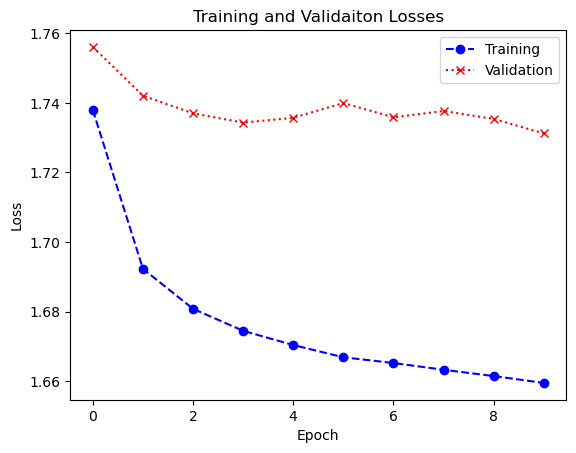

In [111]:
plt.plot(tuned_history['loss'],'bo--')
plt.plot(tuned_history['val_loss'],'rx:')
plt.title("Training and Validaiton Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])

### d)

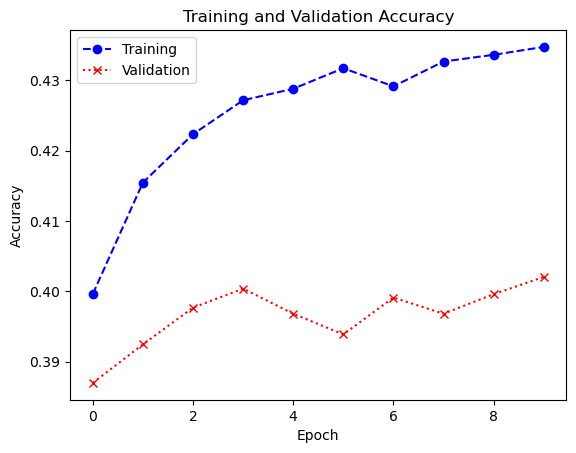

In [112]:
plt.plot(tuned_history["sparse_categorical_accuracy"],"bo--")
plt.plot(tuned_history["val_sparse_categorical_accuracy"],"rx:")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])

## Question 2

### a)

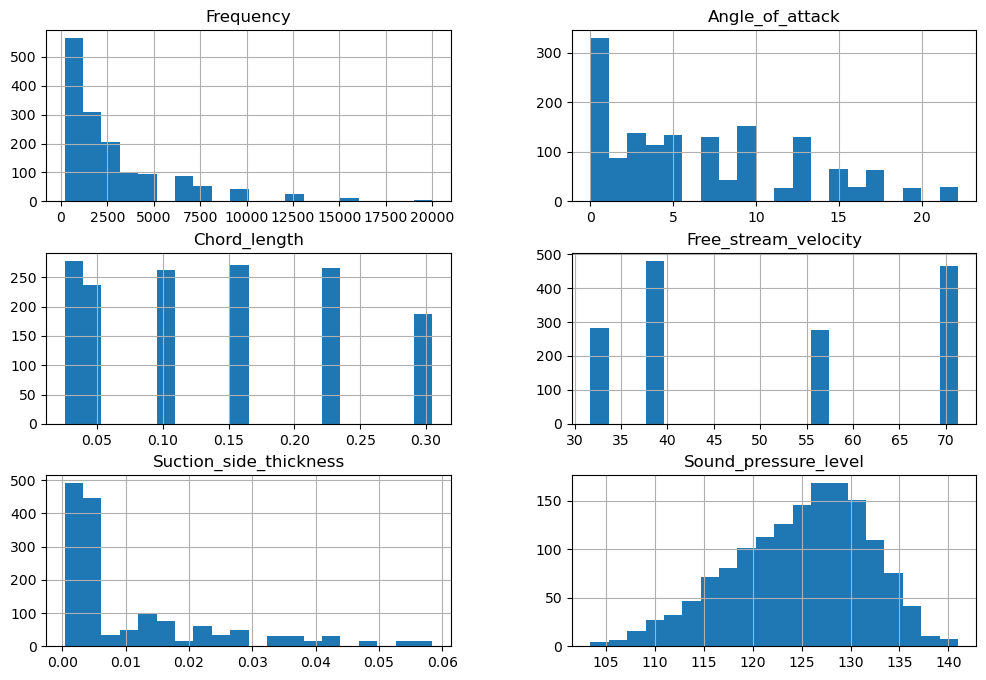

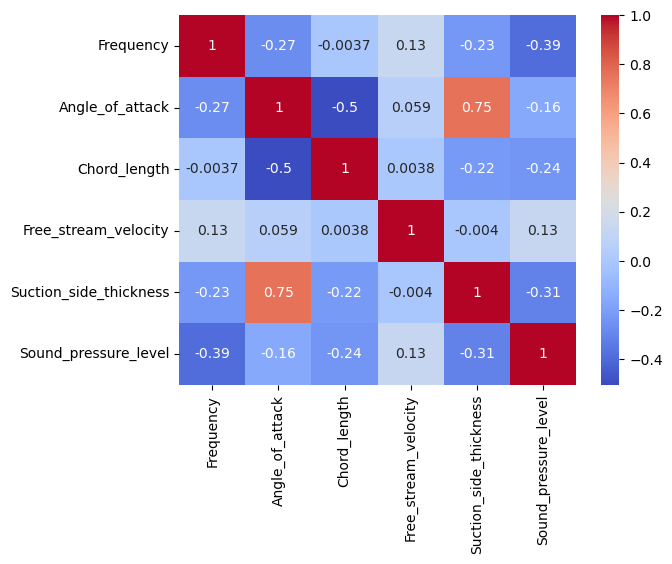

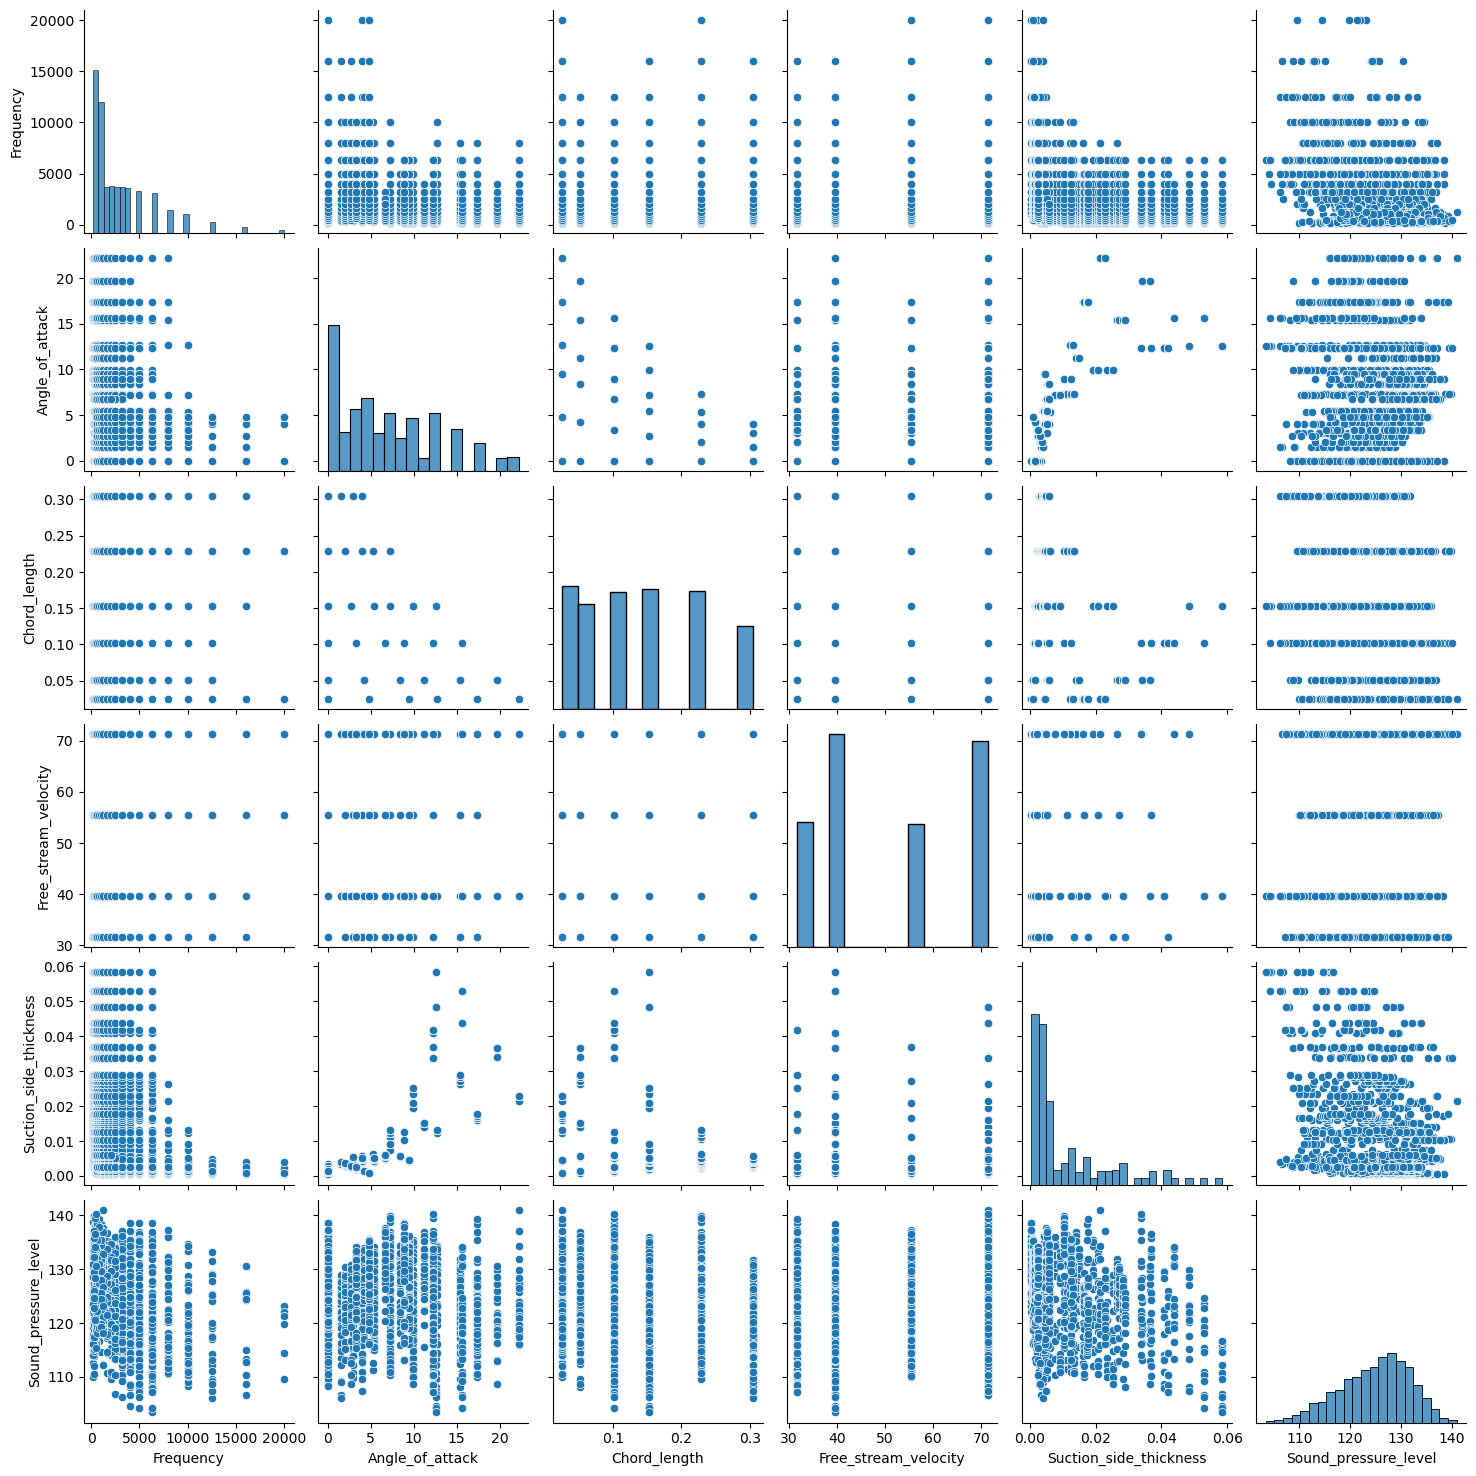

In [82]:
import pandas as pd
import seaborn as sns

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_thickness', 'Sound_pressure_level']
df = pd.read_csv(url, sep='\t', names=columns)

# Histogram
df.hist(bins=20, figsize=(12, 8))
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(df)


### b)

In [165]:
from sklearn.preprocessing import StandardScaler

X_data = df.iloc[:,[0,1,2,3,4]].to_numpy()
y_data = df["Sound_pressure_level"].to_numpy()

scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled,y_data,test_size=0.3)

model = keras.Sequential(
    layers=[
        keras.layers.Input(shape=[5]),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(1)
    ]
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2),loss=keras.losses.MeanSquaredError())
model.fit(X_train,y_train,epochs=50,verbose=0,batch_size=8)

### c)

In [166]:
from sklearn.metrics import r2_score

print("Coefficient of determination: ", r2_score(y_test,model.predict(X_test)))

15/15 [==============================] - 0s 0s/step
Coefficient of determination:  0.7427744698486853
